1. Выбор датасета:
    - Датасет о пассажирах Титаника: [Titanic Dataset](https://www.kaggle.com/c/titanic)
    - Датасет о диабете: [Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
2. Загрузите выбранный датасет и выполните предварительную обработку данных. 
3. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
4. Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим.
5. Реализуйте логистическую регрессию "с нуля" без использования сторонних библиотек, кроме NumPy и Pandas. Ваша реализация логистической регрессии должна включать в себя:
    - Функцию для вычисления гипотезы (sigmoid function).
    - Функцию для вычисления функции потерь (log loss).
    - Метод обучения, который включает в себя градиентный спуск.
    - Возможность варьировать гиперпараметры, такие как коэффициент обучения (learning rate) и количество итераций.
6. Исследование гиперпараметров:
    - Проведите исследование влияния гиперпараметров на производительность модели. Варьируйте следующие гиперпараметры:
        - Коэффициент обучения (learning rate).
        - Количество итераций обучения.
        - Метод оптимизации (например, градиентный спуск или оптимизация Ньютона).
7. Оценка модели:
    - Для каждой комбинации гиперпараметров оцените производительность модели на тестовом наборе данных, используя метрики, такие как accuracy, precision, recall и F1-Score.

Сделайте выводы о том, какие значения гиперпараметров наилучшим образом работают для данного набора данных и задачи классификации. Обратите внимание на изменение производительности модели при варьировании гиперпараметров.

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /Users/kseniaignateva/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [34]:
file_name = 'diabetes.csv'
df = pd.read_csv(f'{path}/{file_name}')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
print([i for i in df.columns])

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'missing_values': missing_values,
    'percentage': missing_percentage
}).sort_values(by='missing_values', ascending=False)

print(missing_summary)

                          missing_values  percentage
Pregnancies                            0         0.0
Glucose                                0         0.0
BloodPressure                          0         0.0
SkinThickness                          0         0.0
Insulin                                0         0.0
BMI                                    0         0.0
DiabetesPedigreeFunction               0         0.0
Age                                    0         0.0
Outcome                                0         0.0


In [42]:
stats = df.describe()
stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(stats.index)
print(stats.columns)

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


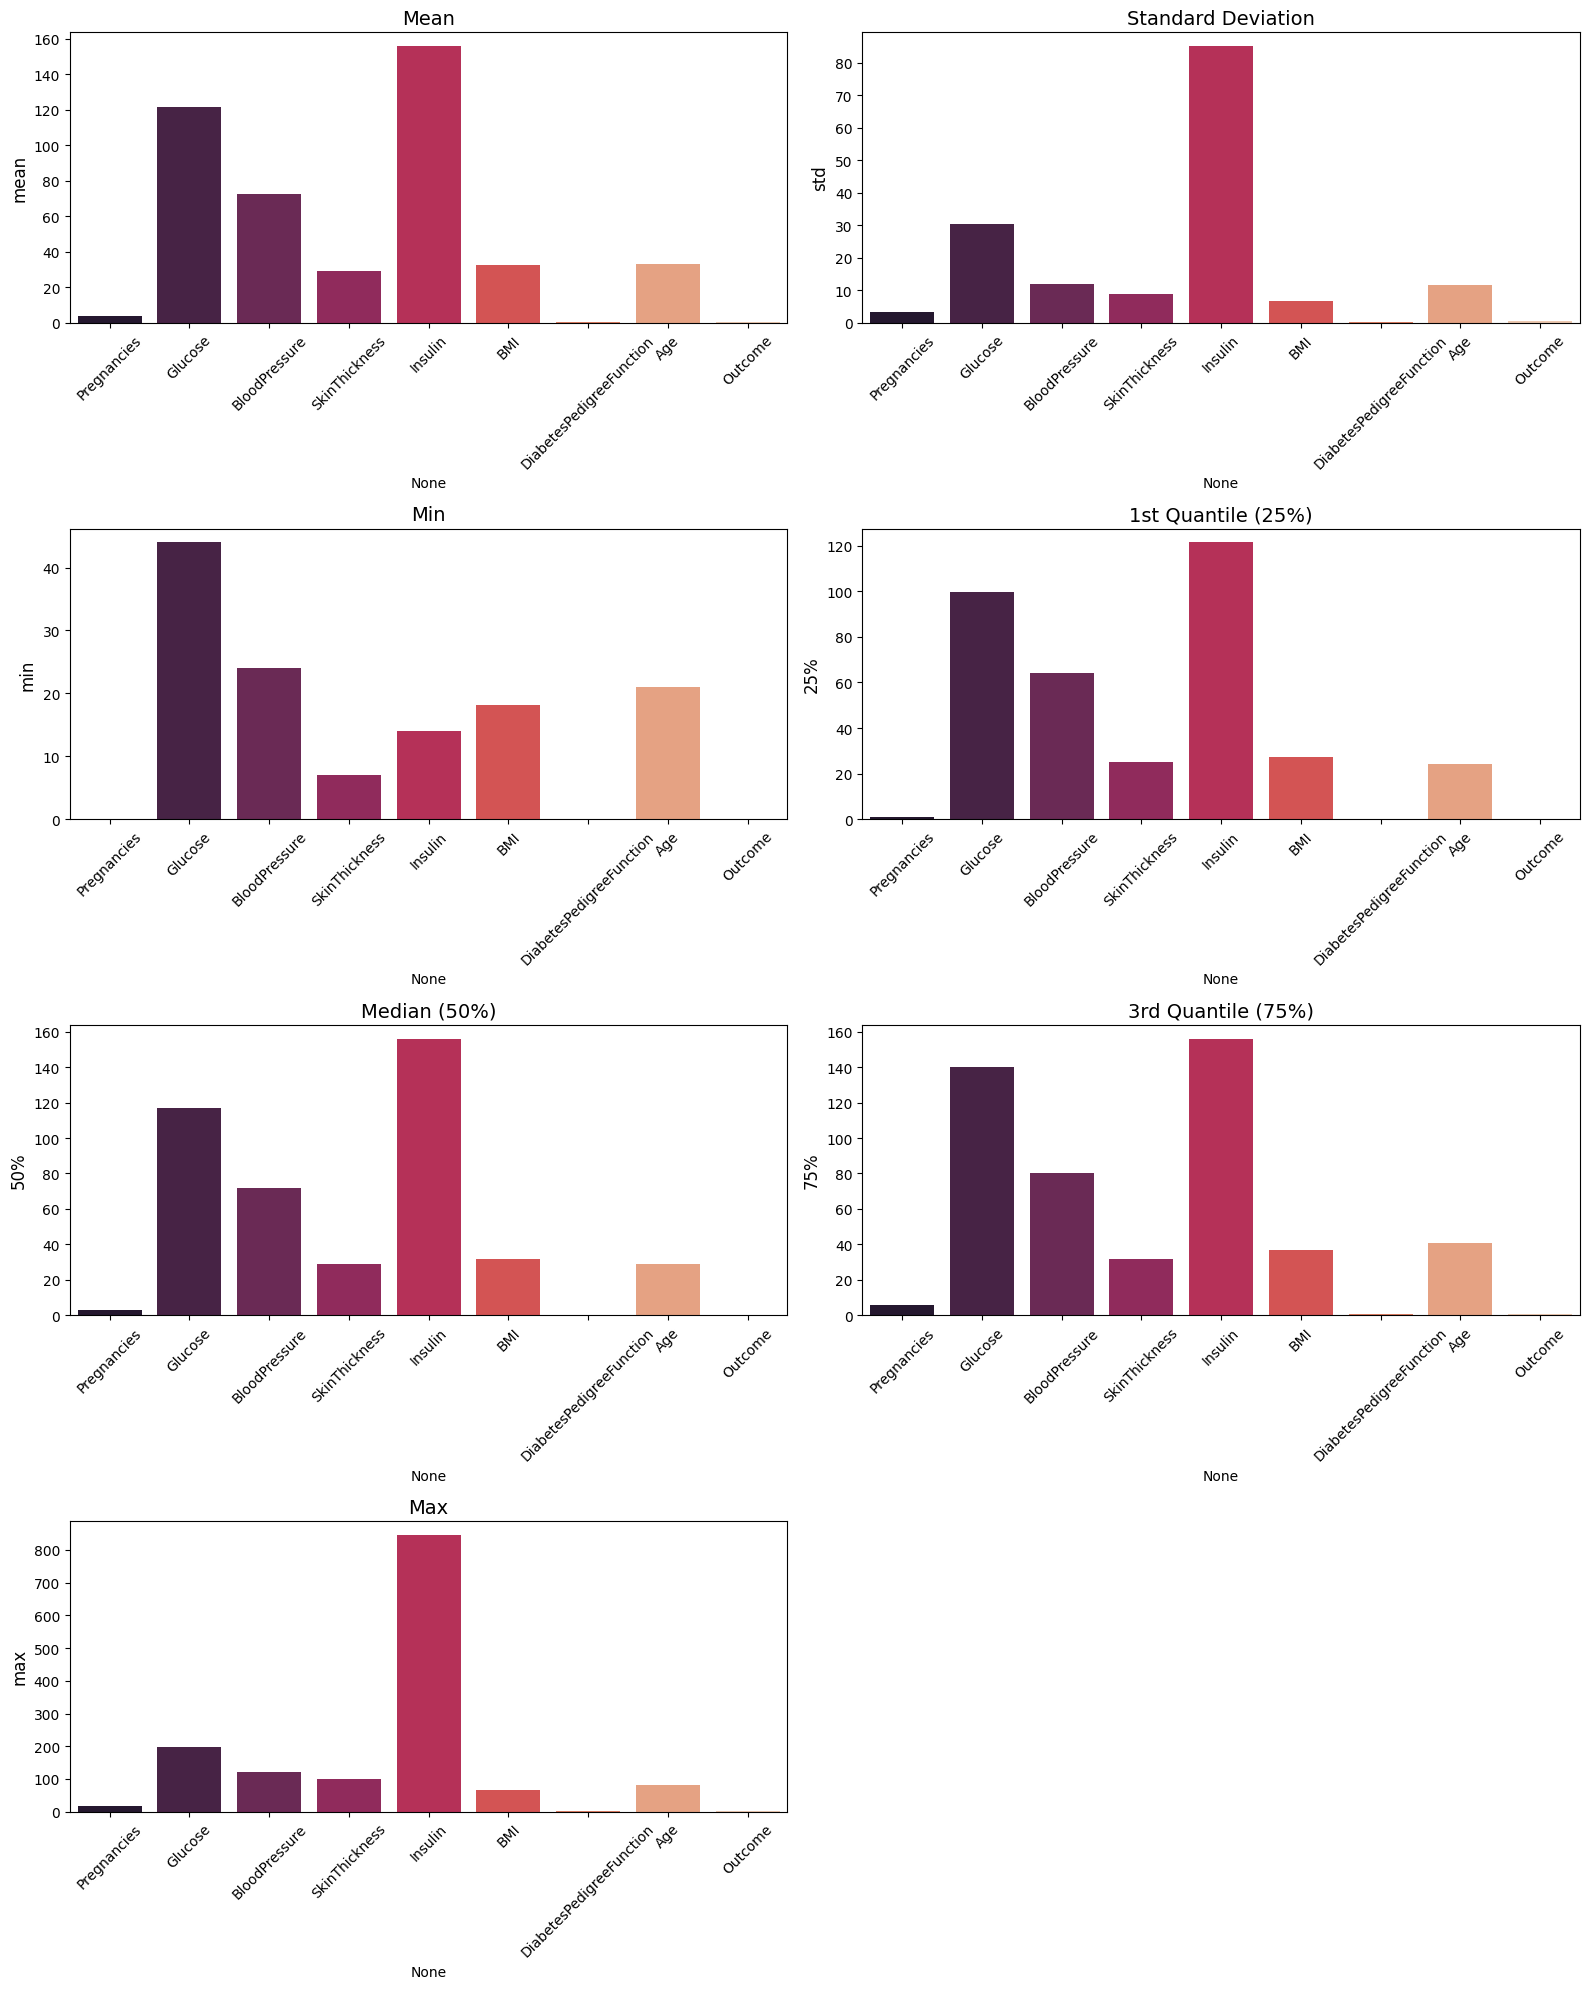

In [45]:
stats_to_plot = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
titles = [
    "Mean",
    "Standard Deviation",
    "Min",
    "1st Quantile (25%)",
    "Median (50%)",
    "3rd Quantile (75%)",
    "Max",
]

plt.figure(figsize=(16, 20))
for i, stat in enumerate(stats_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x=stats.columns, y=stats.loc[stat], palette="rocket")
    plt.title(titles[i], fontsize=14)
    plt.ylabel(stat, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure()
sns.pairplot(df,hue='Outcome', palette='rocket')
plt.show()

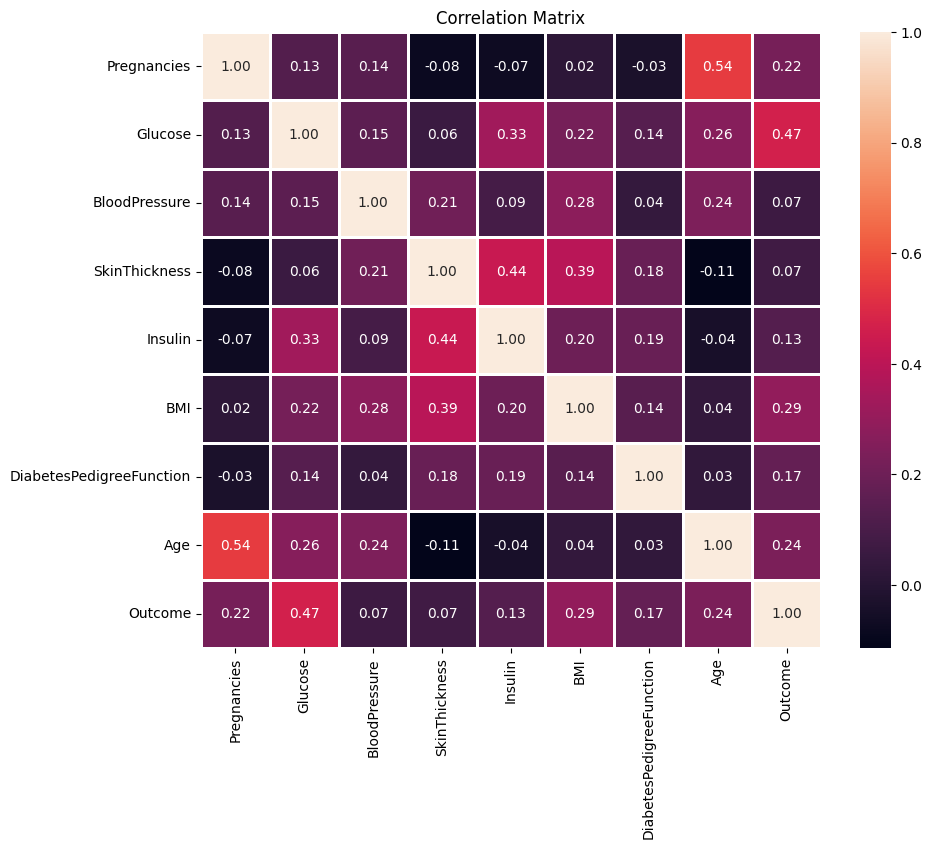

In [26]:
def corr_heatmap(df):
    
    corr_matrix=df.corr(numeric_only=True)
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidths=2 ,cmap='rocket')
    plt.title('Correlation Matrix')
    plt.show()

corr_heatmap(df)

In [47]:
for col in df.columns[1:-3]:
    df[col].replace(0,np.NaN, inplace=True)
    df[col].fillna(round(df[col].mean(skipna=True)), inplace=True)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


robust scaler лучше подходит
- фиксит выбросы 
- использует для приведения данных медиану и 1-3 интерквантильный размах 

In [60]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_processed = scaler.fit_transform(df)
df_processed

X = np.delete(df_processed, 8, axis=1)
y = df_processed[:, 8]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
print(f'X_train size: {X_train.shape}')
print(f'y_train size: {y_train.shape}')
print(f'X_test size: {X_test.shape}')
print(f'y_test size: {y_test.shape}')

X_train size: (537, 8)
y_train size: (537,)
X_test size: (231, 8)
y_test size: (231,)


### outliers detection 

In [46]:
def detect_outliers(df, k=1.5):
    
    outlier_indices = []
    outliers_df = pd.DataFrame()
    
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75) 
        
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers_in_col.index)
        outliers_df = pd.concat([outliers_df, outliers_in_col], axis=0)
        
    # remove duplicate indices
    outlier_indices = list(set(outlier_indices))
    
    # remove duplicate rows in the outliers df
    outliers_df = outliers_df.drop_duplicates()
    
    return outliers_df, outlier_indices

In [16]:
outliers_df, outlier_indices = detect_outliers(df)
outliers_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,156.0,33.6,0.212,38,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
84,5,137.0,108.0,29.0,156.0,48.8,0.227,37,1
106,1,96.0,122.0,29.0,156.0,22.4,0.207,27,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [ ]:
df_cleaned=df.drop(outlier_indices).reset_index(drop=True)
print(f'past: {len(df)}\nnow: {len(df_cleaned)}\ndroped: {int(len(df)) - int(len(df_cleaned))}')

In [ ]:
X=df_cleaned.drop('Outcome',axis=1)
y=df_cleaned['Outcome']
print(f'X: {X.shape}\ny: {y.shape}')

### logistic regression model 

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred, epsilon = 1e-15):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    m = len(y_true)
    return -1 / m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [82]:
from sklearn.metrics import classification_report

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, lambda_=0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.lambda_ = lambda_

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        
        for i in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = 1 / m * np.dot(X.T, (y_pred - y)) + (self.lambda_ / m) * self.weights
            db = 1 / m * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = log_loss(y, y_pred)
            self.losses.append(loss)
            
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss:.5f}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred >= 0.5).astype(int)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'iterations': self.iterations,
            'lambda_': self.lambda_
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

Iteration 0: Loss = 0.69315
Iteration 100: Loss = 0.62356
Iteration 200: Loss = 0.59206
Iteration 300: Loss = 0.57074
Iteration 400: Loss = 0.55488
Iteration 500: Loss = 0.54258
Iteration 600: Loss = 0.53284
Iteration 700: Loss = 0.52498
Iteration 800: Loss = 0.51855
Iteration 900: Loss = 0.51325
Iteration 1000: Loss = 0.50882
Iteration 1100: Loss = 0.50509
Iteration 1200: Loss = 0.50193
Iteration 1300: Loss = 0.49924
Iteration 1400: Loss = 0.49694
Iteration 1500: Loss = 0.49495
Iteration 1600: Loss = 0.49322
Iteration 1700: Loss = 0.49172
Iteration 1800: Loss = 0.49041
Iteration 1900: Loss = 0.48926
Iteration 2000: Loss = 0.48825
Iteration 2100: Loss = 0.48736
Iteration 2200: Loss = 0.48657
Iteration 2300: Loss = 0.48587
Iteration 2400: Loss = 0.48525
Iteration 2500: Loss = 0.48470
Iteration 2600: Loss = 0.48420
Iteration 2700: Loss = 0.48376
Iteration 2800: Loss = 0.48336
Iteration 2900: Loss = 0.48300
Accuracy: 0.76190
Accuracy: 0.7619
              precision    recall  f1-score   s

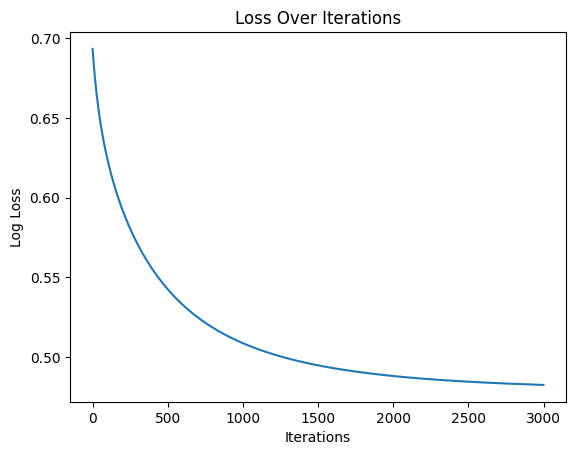

In [84]:
model = LogisticRegression(learning_rate=0.01, iterations=3000, lambda_=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.5f}")
y_pred = model.predict(X_test)
print(f"Accuracy: {np.mean(y_pred == y_test):.4f}")
print(classification_report(y_test, y_pred))

plt.plot(range(model.iterations), model.losses)
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Loss Over Iterations")
plt.show()

In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(scores):.4f}")


Iteration 0: Loss = 0.69315
Iteration 100: Loss = 0.61864
Iteration 200: Loss = 0.58533
Iteration 300: Loss = 0.56291
Iteration 400: Loss = 0.54615
Iteration 500: Loss = 0.53308
Iteration 600: Loss = 0.52262
Iteration 700: Loss = 0.51409
Iteration 800: Loss = 0.50705
Iteration 900: Loss = 0.50116
Iteration 1000: Loss = 0.49620
Iteration 1100: Loss = 0.49197
Iteration 1200: Loss = 0.48836
Iteration 1300: Loss = 0.48523
Iteration 1400: Loss = 0.48253
Iteration 1500: Loss = 0.48017
Iteration 1600: Loss = 0.47810
Iteration 1700: Loss = 0.47629
Iteration 1800: Loss = 0.47468
Iteration 1900: Loss = 0.47326
Iteration 2000: Loss = 0.47200
Iteration 2100: Loss = 0.47087
Iteration 2200: Loss = 0.46987
Iteration 2300: Loss = 0.46896
Iteration 2400: Loss = 0.46815
Iteration 2500: Loss = 0.46742
Iteration 2600: Loss = 0.46676
Iteration 2700: Loss = 0.46616
Iteration 2800: Loss = 0.46562
Iteration 2900: Loss = 0.46513
Iteration 0: Loss = 0.69315
Iteration 100: Loss = 0.60654
Iteration 200: Loss = 0.